In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier  
data = pd.read_csv('Autism-Adult-Data.arff',na_values="?")

In [3]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,no,yes,6,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,no,no,2,NO


In [4]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.650568,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507942,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [5]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)

In [6]:
data.rename(columns={'Class/ASD': 'decision_class'}, inplace=True)
data.jundice = data.jundice.apply(lambda x: 0 if x == 'no' else 1)
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)
data.austim = data.austim.apply(lambda x: 0 if x == 'no' else 1)
le = LabelEncoder()
data.gender = le.fit_transform(data.gender) 
data.drop(['result'], axis=1, inplace=True)

In [7]:
X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'austim', 'gender',
       'jundice']]
print(X)
Y=data[['decision_class']]
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
y_train=y_train.values.ravel()

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  age  austim  gender  jundice  
0       

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)    
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)


[[150   9]
 [  7  46]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.84      0.87      0.85        53

    accuracy                           0.92       212
   macro avg       0.90      0.91      0.90       212
weighted avg       0.93      0.92      0.92       212

Accuracy is  92.45283018867924


In [9]:
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8915094339622641, 0.9009433962264151, 0.8962264150943396, 0.910377358490566, 0.9245283018867925, 0.9245283018867925, 0.9528301886792453, 0.9292452830188679, 0.9292452830188679, 0.910377358490566, 0.910377358490566, 0.8915094339622641, 0.9056603773584906, 0.9150943396226415, 0.9056603773584906, 0.9009433962264151, 0.9009433962264151, 0.9009433962264151, 0.9056603773584906, 0.9009433962264151, 0.9009433962264151, 0.8867924528301887, 0.9009433962264151, 0.8867924528301887, 0.8820754716981132]


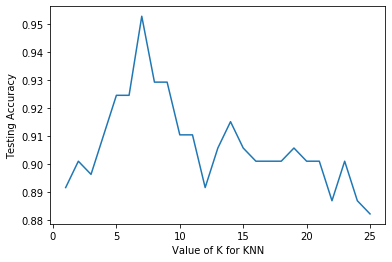

In [10]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy import optimize as op
data = pd.read_csv('autism_child_data.csv',na_values="?")

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         0         0         0         1         1   
3         0         1         0         0         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  age gender jundice austim  result Class/ASD  
0         1         0          0    6      m      no     no       5        NO  
1         1         0          0    6      m      no     no       5        NO  
2         1         0          0    6      m      no     no       5        NO  
3         0         0          1    5      f     yes     no       4        NO  
4         1         1          1    5      m     yes     no      10       YES  


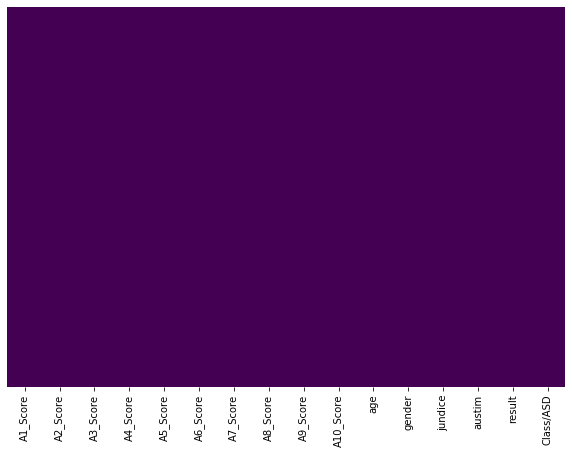

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)
print(data.head())

In [13]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
print(missing_data.head())

In [14]:
data.rename(columns={'Class/ASD': 'decision_class'}, inplace=True)
data.jundice = data.jundice.apply(lambda x: 0 if x == 'no' else 1)
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)
data.austim = data.austim.apply(lambda x: 0 if x == 'no' else 1)
le = LabelEncoder()
data.gender = le.fit_transform(data.gender) 
data.drop(['result'], axis=1, inplace=True)

print(data.isnull().sum())

A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
age               0
gender            0
jundice           0
austim            0
decision_class    0
dtype: int64


In [15]:
X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'austim', 'gender',
       'jundice']]
print(X)
Y=data[['decision_class']]
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
#y_train=y_train.values.ravel()

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         0         0         1         1         0   
1           1         1         0         0         1         1         0   
2           1         1         0         0         0         1         1   
3           0         1         0         0         1         1         0   
4           1         1         1         1         1         1         1   
..        ...       ...       ...       ...       ...       ...       ...   
287         1         1         1         1         1         1         1   
288         1         0         0         0         1         0         1   
289         1         0         1         1         1         1         1   
290         1         1         1         0         1         1         1   
291         0         0         1         0         1         0         1   

     A8_Score  A9_Score  A10_Score  age  austim  gender  jundice  
0       

In [16]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


In [17]:
#Regularized cost function
def regCostFunction(theta, X, y, _lambda = 0.1):
    m = y.size
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg


In [18]:
def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

In [19]:
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x

In [20]:
Autism_Status = [1, 0]
#Number of examples
m = data.shape[0]
#Features
n = 13
#Number of classes
k = 2
#Training
print(Autism_Status)

[1, 0]


In [21]:
all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for Autism in Autism_Status:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train ==  Autism, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [22]:
P = sigmoid(X_test.dot(all_theta.T)) #probability for each flower
p = [Autism_Status[np.argmax(P.values[i, :])] for i in range(X_test.shape[0])]

print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

Test Accuracy  86.36363636363636 %


In [23]:
print(classification_report(y_true=y_test,y_pred=p))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.90      0.86      0.88        50

    accuracy                           0.86        88
   macro avg       0.86      0.86      0.86        88
weighted avg       0.87      0.86      0.86        88



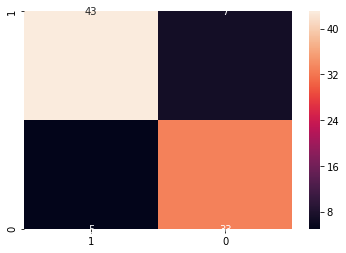

In [24]:
cfm = confusion_matrix(y_test, p, labels = Autism_Status)
sb.heatmap(cfm, annot = True, xticklabels = Autism_Status, yticklabels = Autism_Status);

In [15]:
import pandas as pd
import numpy as np
#import graphviz
#import pydotplus
from os import system
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
data = pd.read_csv('Autism-Adult-Data.arff')

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender jundice austim  result Class/ASD  
0         1         0          0   26      f      no     no       6        NO  
1         1         0          1   24      m      no    yes       5        NO  
2         1         1          1   27      m     yes    yes       8       YES  
3         1         0          1   35      f      no    yes       6        NO  
4         1         0          0   40      f      no     no       2        NO  


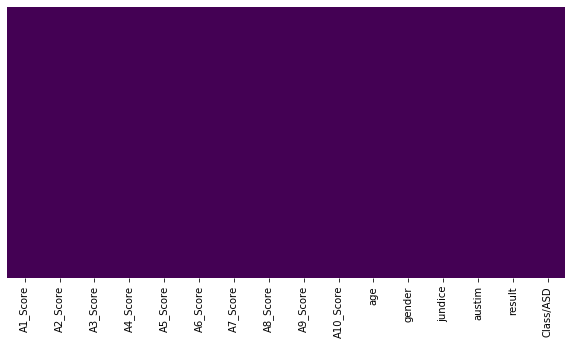

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)
print(data.head())

In [14]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
print(missing_data.head())

           Total  Percent
Class/ASD      0      0.0
result         0      0.0
austim         0      0.0
jundice        0      0.0
gender         0      0.0


In [5]:
data.rename(columns={'Class/ASD': 'decision_class'}, inplace=True)
data.jundice = data.jundice.apply(lambda x: 0 if x == 'no' else 1)
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)
data.austim = data.austim.apply(lambda x: 0 if x == 'no' else 1)
le = LabelEncoder()
data.gender = le.fit_transform(data.gender) 
data.drop(['result'], axis=1, inplace=True)

print(data.isnull().sum())

A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
age               0
gender            0
jundice           0
austim            0
decision_class    0
dtype: int64


In [6]:
X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'austim', 'gender',
       'jundice']]
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  age  austim  gender  jundice  
0       

In [7]:
Y=data[['decision_class']]
print(Y.shape)

(704, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
#y_train=y_train.values.ravel()
feature_names=X.columns
print(feature_names)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'austim',
       'gender', 'jundice'],
      dtype='object')


In [9]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0]


In [10]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  84.43396226415094


In [34]:
feature_target = ['1','0']
tree.export_graphviz(clf_entropy, out_file='tree.dot', feature_names = feature_names, class_names = feature_target, filled = True, rounded = True, special_characters = True)
system("dot -Tpng tree.dot -o tree.png ")

1